# Exploratory Data Analysis of Telecom Customer Churn

### Objective
To develop a better understanding of the underlying structure and characteristics of the Customer Churn data, which can guide in identifying potential problems and opportunities for further analysis.

### Dataset Context
Churn data for a fictional Telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.

## Importing libraries and dataset

In [3]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Load Dataset
df =  pd.read_csv('telecom_customer_churn.csv')

## Data Understanding

In [5]:
# First 5 rows dataset
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
# Identify the shape of the dataset
df.shape

(7043, 38)

Dataset comprises of 7043 observations and 38 variables

In [7]:
# Identify data types for each column
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

- Data has only float, integer and string values.
- The data type in the data is proper.

In [8]:
# Get basics dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

At a glance, we can see that some columns in the data contain missing values.

In [9]:
# Get number of unique values in each columns
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

## Missing and Duplicate values

In [10]:
# Identify missing value
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [11]:
df.isna().sum() *100 / len(df)

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                 0.000000
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

The dataset has a fairly high missing value, especially in categorical columns. The `Churn Category` and `Churn Reason` columns have the highest missing value by 73%.


In [12]:
# Identify duplicate rows
duplicates = df.duplicated()
print('Number of duplicate records:',duplicates.sum())

Number of duplicate records: 0


This dataset does not have any duplicate values.

## Data Exploration

### Get summary statistics

In [13]:
df.describe() # numeric

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [14]:
df.describe(include='O') # categoric

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,7043,7043,7043,7043,7043,7043,6361,7043,5517,5517,...,5517,5517,5517,5517,7043,7043,7043,7043,1869,1869
unique,7043,2,2,1106,6,2,2,2,3,2,...,2,2,2,2,3,2,3,3,5,20
top,0002-ORFBO,Male,No,Los Angeles,None,Yes,No,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,1,3555,3641,293,3877,6361,3390,5517,3035,3498,...,2810,2785,3029,4745,3610,4171,3909,4720,841,313


### Distribution of data

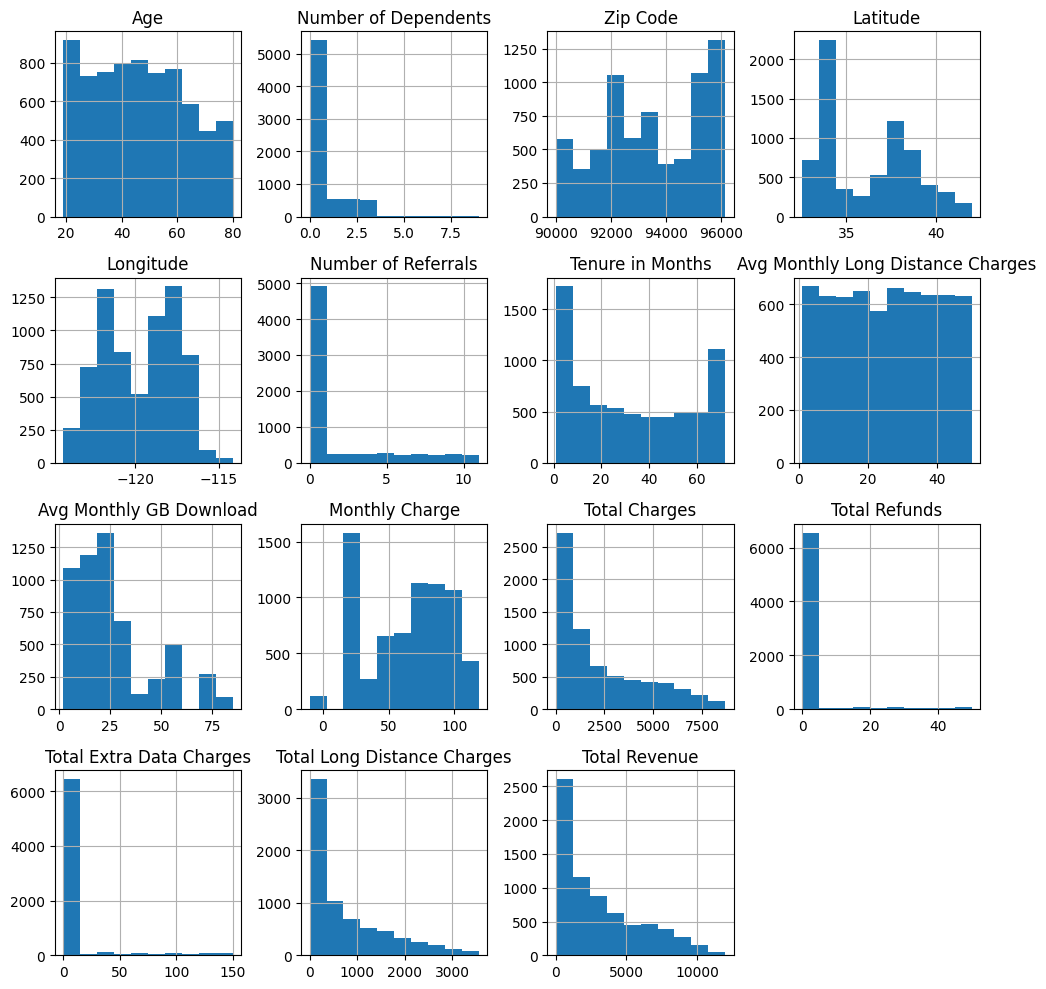

In [15]:
df.hist(figsize=(10,10), bins=10)
plt.tight_layout()

From the histogram above, some columns look right skewed which indicates that there are outliers. Columns that look right skewed such as, `Number of Dependents`, `Number of Referrals`, `Avg Monthly GB Download`, `Total Charges`, `Total Refunds`, `Total Extra Data Charges`, `Total Long Distance Charges`, and `Total Revenue`.

For more details, let's calculate the skewness of the dataset using `.skew()`. A positive skew indicates that the distribution has a long right tail, while a negative skew indicates a long left tail. A skewness value close to zero indicates a symmetrical distribution.

In [16]:
skewness_pandas = df.skew()
skewness_pandas

<ipython-input-16-714776889374>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness_pandas = df.skew()


Age                                  0.162186
Number of Dependents                 2.109932
Zip Code                            -0.209615
Latitude                             0.314804
Longitude                           -0.091932
Number of Referrals                  1.446060
Tenure in Months                     0.240543
Avg Monthly Long Distance Charges   -0.001971
Avg Monthly GB Download              1.184056
Monthly Charge                      -0.275394
Total Charges                        0.963791
Total Refunds                        4.328517
Total Extra Data Charges             4.091209
Total Long Distance Charges          1.238282
Total Revenue                        0.919410
dtype: float64

It can be seen that there are data that are left skewed (negative values) namely `Zip Code`, `Logitude`, `Avg Monthly Long Distance Charges`, `Monthly Charge`.

### Correlation

<ipython-input-17-0a4494c69533>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df_corr.corr(),2), annot=True)


Text(0.5, 1.0, 'Correlation')

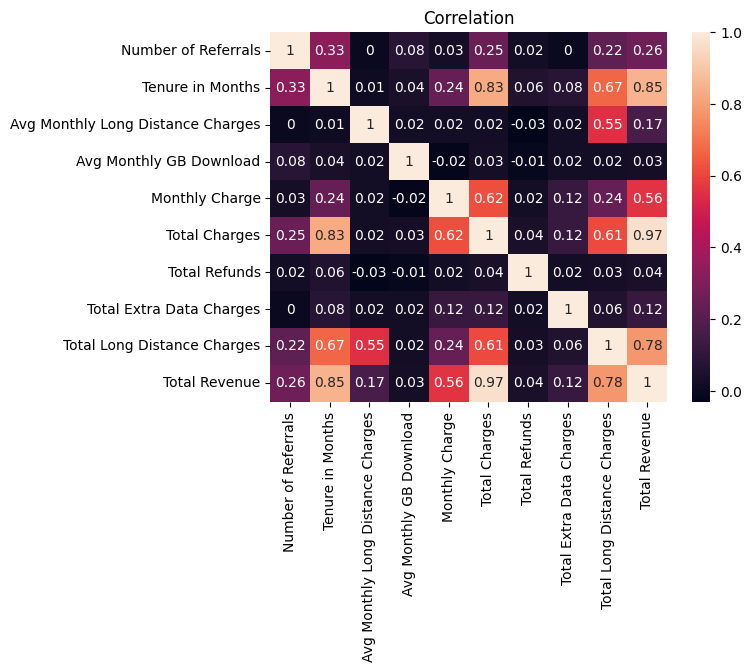

In [17]:
# Correlation heatmap numeric var (exclude: age, num_dependents, lat, long)
df_corr = df.drop(columns=['Age','Number of Dependents','Latitude','Longitude','Zip Code'])
sns.heatmap(np.round(df_corr.corr(),2), annot=True)
plt.title('Correlation')

Based on the correlation heatmap above, there are several columns that have a strong positive correlation, namely:
- `Total Long Distance Charges` vs `Total Revenue` = 0.78 (strong positive)
- `Tenure in Months` vs `Total Charges` = 0.83 (very strong positive)
- `Tenure in Months` vs `Total Revenue` = 0.85 (very strong positive)
- `Total Charges` vs `Total Revenue` = 0.97 (very strong positive)

### Calculating Total Customer, Customer Churn, and Churn Rate

In [18]:
total_cust = df['Customer ID'].nunique()
filter = df[df['Customer Status'] == 'Churned']
total_churn = filter['Customer Status'].count()
churn_rate = total_churn/total_cust

print('Total Customers:',total_cust)
print('Total Customer Churn:',total_churn)
print('Churn Rate:',churn_rate)

Total Customers: 7043
Total Customer Churn: 1869
Churn Rate: 0.2653698707936959


From a total of 7043 customers, 1869 have churned with a percentage by 26%.

### Calculating the Percentage of Churn by City

In [19]:
# Top 10 city with highest churn percentage
churned = df[df['Customer Status'] == 'Churned']
pct_churn_city = round(df['City'].value_counts(normalize=True) * 100, 2)
pct_churn_city = pct_churn_city.reset_index()
pct_churn_city.head(10)

,index,City
0,Los Angeles,4.16
1,San Diego,4.05
2,San Jose,1.59
3,Sacramento,1.53
4,San Francisco,1.48
5,Fresno,0.87
6,Long Beach,0.85
7,Oakland,0.74
8,Escondido,0.72
9,Stockton,0.62


It can be seen that the most churned customer comes from `Los Angeles`, followed by `San Diego` and `San Jose` at the second and third highest.

### Customer Status: Churned, Stayed, Joined

Text(0.5, 1.0, 'Customer Status: Churned, Stayed, Joined')

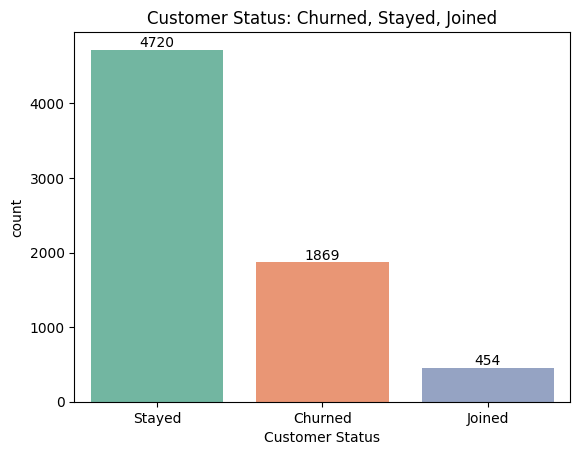

In [20]:
ax = sns.countplot(x='Customer Status', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Customer Status: Churned, Stayed, Joined')

The following is the number of customers based on their status. A total of 4720 customers chose to stayed, 454 joined, and 1869 churned in the last quarter (Q2 2022).

### Churn Reason

In [21]:
df.groupby('Churn Reason')['Customer ID'].count().sort_values(ascending=False)

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: C

Based on the results above, it can be seen that the reason for the majority of churned customers is 'Competitor'. Let's see if 'Competitor' is really the cause of churned customer in the `Churn Category` column.

### Churn Category

<ipython-input-22-1b6477297735>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.displot(df, x='Churn Category', palette='coolwarm').set(title='Churn Category')


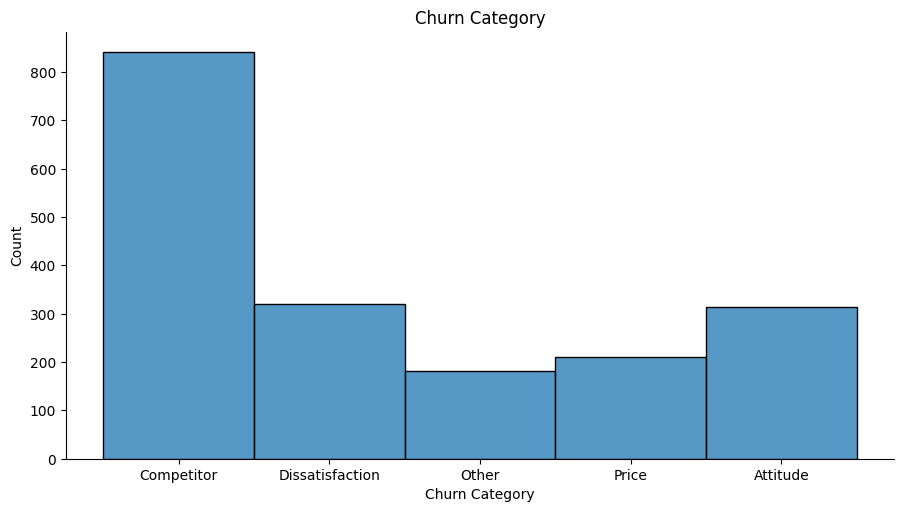

In [22]:
g = sns.displot(df, x='Churn Category', palette='coolwarm').set(title='Churn Category')
g.fig.set_figwidth(10)


It can be seen in the histogram above, it is true that 'Competitor' is the reason why customers churned. In addition, 'Attitude', 'Dissatisfaction', and 'Price' are other reasons for customers to churned.

### Demographics: Age

In [23]:
# Create new label based on Age
df['Age_Group'] = np.select(
    [
        df['Age'].between(0, 19, inclusive='both'),
        df['Age'].between(20, 29, inclusive='both'),
        df['Age'].between(30, 39, inclusive='both'),
        df['Age'].between(40, 49, inclusive='both'),
        df['Age'].between(50, 59, inclusive='both'),
        df['Age'].between(60, 69, inclusive='both'),
        df['Age'].between(70, 79, inclusive='both'),
        df['Age']>=80
    ],
    [
        '<20',
        '20-29',
        '30-39',
        '40-49',
        '50-59',
        '60-69',
        '70-79',
        '>=80'
    ]
)

Text(0.5, 1.0, 'Age Group by Customer Status')

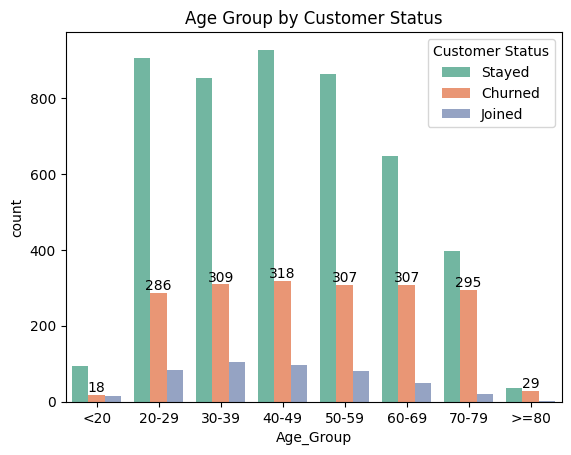

In [24]:
# Age Group by Customer Status
ax = sns.countplot(x='Age_Group', hue='Customer Status',
                   order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','>=80'],
                   data=df, palette='Set2')
ax.bar_label(ax.containers[1])
plt.title('Age Group by Customer Status')

The majority of churned customers are in the age range of 30 to 60. Customers with an age range of 40-49 are the most likely to be churned.

### Customer Behavior: Phone and Internet Services

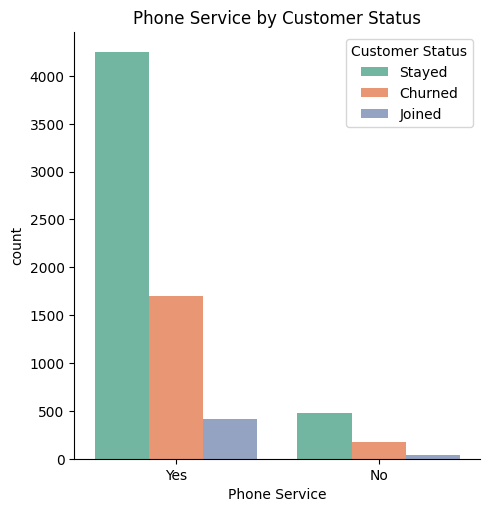

In [40]:
# Phone Service separated by Customer Status
sns.catplot(
    data=df, x="Phone Service", hue="Customer Status", kind="count",
    palette="Set2", legend_out=False
).set(title="Phone Service by Customer Status")

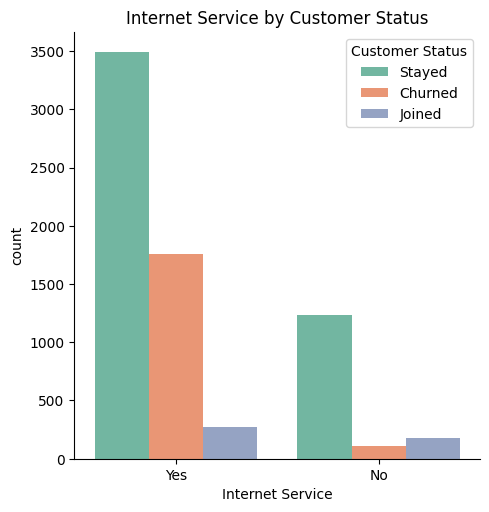

In [42]:
# Internet Service separated by Customer Status
sns.catplot(
    data=df, x="Internet Service", hue="Customer Status", kind="count",
    palette="Set2", legend_out=False
).set(title="Internet Service by Customer Status")

It can be seen that, all customers (Stayed, Churned, Joined) tend to subscribe telephone and internet services. The proportion of subscribed services (phone and internet) is the highest for customers who stayed.

### Customer Behavior: Streaming TV, Movies, Music

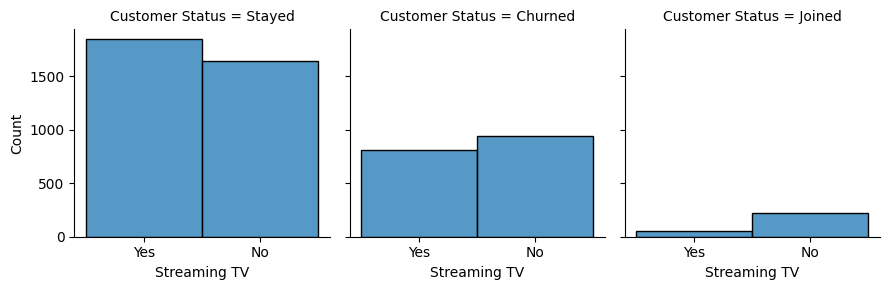

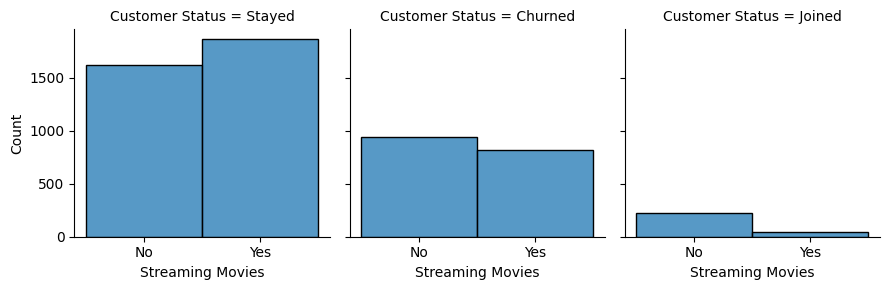

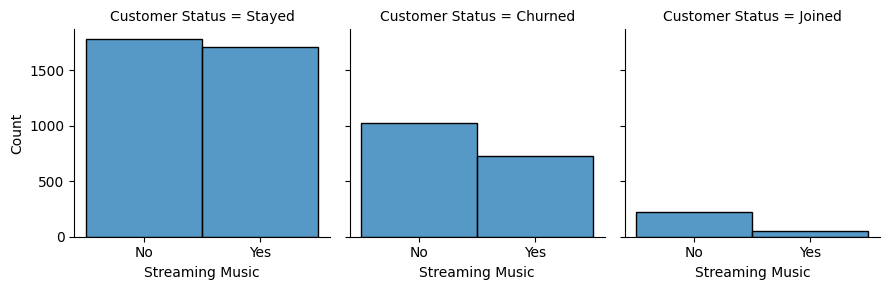

In [27]:
# Streaming TV
g = sns.FacetGrid(df, col="Customer Status")
g.map(sns.histplot, "Streaming TV")
# Streaming Movies
g = sns.FacetGrid(df, col="Customer Status")
g.map(sns.histplot, "Streaming Movies")
# Streaming Music
g = sns.FacetGrid(df, col="Customer Status")
g.map(sns.histplot, "Streaming Music")

Churned customers tend not to use all streaming services (TV, Movies, Music). Meanwhile, stayed customers are more likely to use Movies and TV streaming, compared to Music services.

### Customer Behavior: Avg Monthly GB Download vs Customer Status

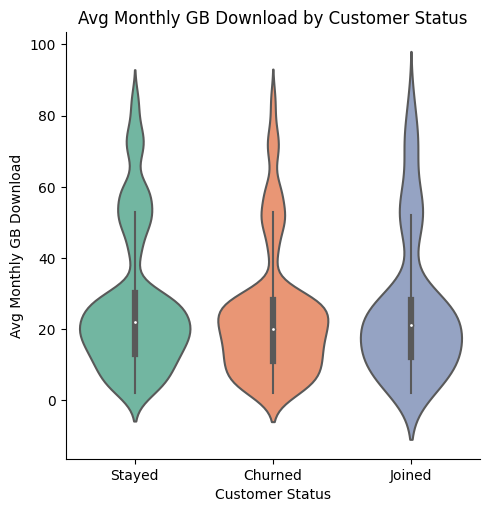

In [28]:
sns.catplot(
    data=df, x="Customer Status", y="Avg Monthly GB Download",
    kind="violin",  split=True, palette='Set2'
).set(title="Avg Monthly GB Download by Customer Status")

Most customers (stayed, churned, joined) have a range between 0 to 50 GB download per month. We can see that there is no significant difference in the average GB download per month for each customer status.

### Customer Behavior: Premium Tech Support vs Customer Status


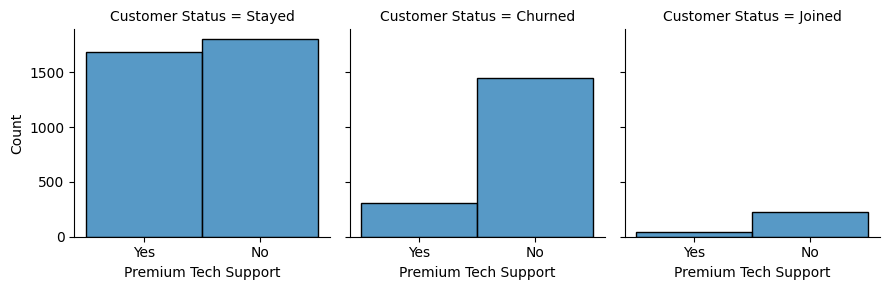

In [29]:
g = sns.FacetGrid(df, col="Customer Status")
g.map(sns.histplot, "Premium Tech Support")

It can be seen that, many of the customers (churned, stayed, joined) tend not to subscribe to premium technical support. Stayed customers are more likely to subscribe premium technical support than churned customers.

### Customer Behavior: Unlimited Data vs Customer Status

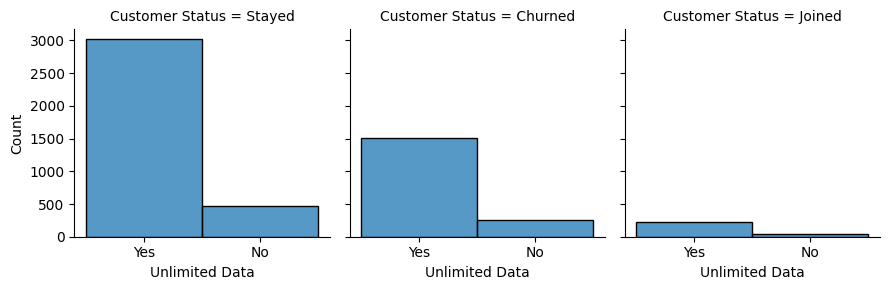

In [30]:
g = sns.FacetGrid(df, col="Customer Status")
g.map(sns.histplot, "Unlimited Data")

It can be seen that many of the customers (churned, stayed, joined) tend to add unlimited data services. Stayed customers are more likely to buy unlimited data services than churned customers.

### Contract

[Text(0.5, 1.0, 'Contract')]

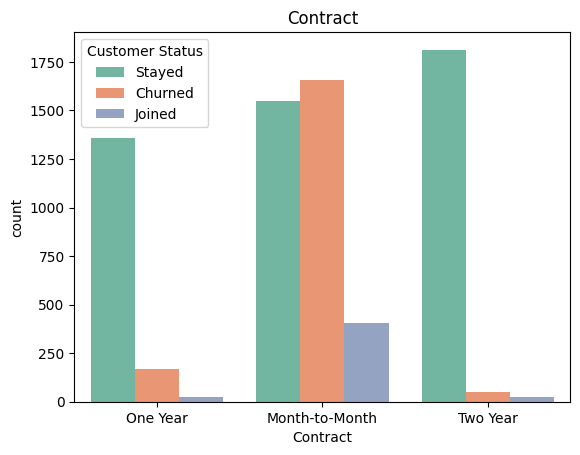

In [31]:
ax = sns.countplot(x='Contract', hue='Customer Status',
                   data=df, palette='Set2')
ax.set(title='Contract')

It can be seen that, stayed customers have a tendency to choose the annual contract. Meanwhile, churned customers have a tendency to choose the monthly contract.

### Tenure in Months

In [32]:
# Create new label based on Tenure in Months (split every 12 month)
df['Tenure in Months Grouped'] = np.select(
    [
        df['Tenure in Months'].between(1, 12, inclusive='both'),
        df['Tenure in Months'].between(13, 24, inclusive='both'),
        df['Tenure in Months'].between(25, 36, inclusive='both'),
        df['Tenure in Months'].between(37, 48, inclusive='both'),
        df['Tenure in Months'].between(49, 60, inclusive='both'),
        df['Tenure in Months'].between(61, 72, inclusive='both')
    ],
    [
        '1 Year',
        '2 Year',
        '3 Year',
        '4 Year',
        '5 Year',
        '6 Year'
    ]
)

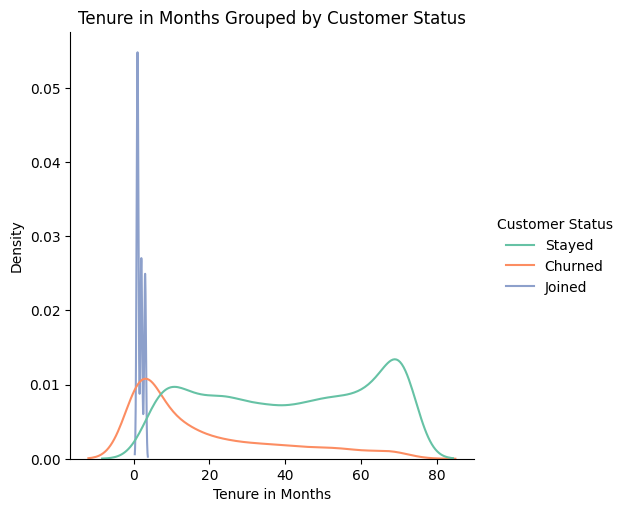

In [33]:
# Tenure in Months Grouped by Customer Status
sns.displot(df, x="Tenure in Months", hue="Customer Status", kind="kde", palette="Set2") \
       .set(title="Tenure in Months Grouped by Customer Status")

It can be seen that, stayed customers are the loyal users with a subscription length of up to 6 years. Meanwhile, most churned customers are found subscribing for only up to 1 year. In the following years, the number of churned customers who subscribe decreases dramatically.

### Customer Status vs Revenue

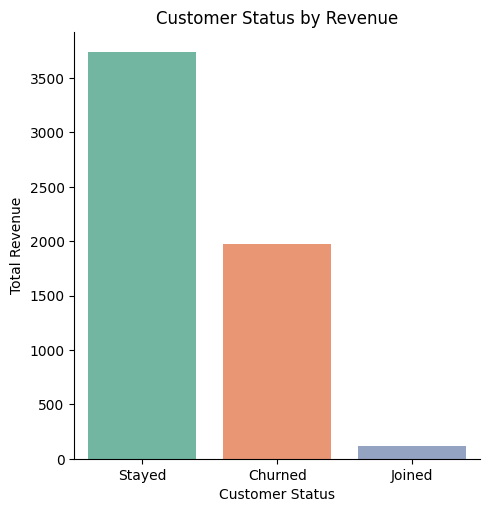

In [43]:
sns.catplot(data=df, x="Customer Status", y="Total Revenue", kind="bar", palette="Set2", errorbar=None) \
       .set(title="Customer Status by Revenue")

It can be seen that, stayed customers earn the most revenue compared to churned customers.

### Appendix 1: Data Dictionary

1. ***CustomerID:*** A unique ID that identifies each customer
2. ***Gender:*** The customer’s gender: Male, Female
3. ***Age:*** The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022)
4. ***Married:*** Indicates if the customer is married: Yes, No
5. ***Number of Dependents:*** Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)
6. ***City:*** The city of the customer’s primary residence in California
7. ***Zip Code:*** The zip code of the customer’s primary residence
8. ***Latitude:*** The latitude of the customer’s primary residence
9. ***Longitude:*** The longitude of the customer’s primary residence
10. ***Number of Referrals:*** Indicates the number of times the customer has referred a friend or family member to this company to date
11. ***Tenure in Months:*** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above
12. ***Offer:*** Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E
13. ***Phone Service:*** Indicates if the customer subscribes to home phone service with the company: Yes, No
14. ***Avg Monthly Long Distance Charges:*** Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above (if the customer is not subscribed to home phone service, this will be 0)
15. ***Multiple Lines:*** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (if the customer is not subscribed to home phone service, this will be No)
16. ***Internet Service:*** Indicates if the customer subscribes to Internet service with the company: Yes, No
17. ***Internet Type:*** Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)
18. ***Avg Monthly GB Download:*** Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0)
19. ***Online Security:*** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)
20. ***Online Backup:*** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)
21. ***Device Protection Plan:*** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)
22. ***Premium Tech Support:*** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No)
23. ***Streaming TV:*** Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)
24. ***Streaming Movies:*** Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)
25. ***Streaming Music:*** Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)
26. ***Unlimited Data:*** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No (if the customer is not subscribed to internet service, this will be No)
27. ***Contract:*** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year
28. ***Paperless Billing:*** Indicates if the customer has chosen paperless billing: Yes, No
29. ***Payment Method:*** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
30. ***Monthly Charge:*** Indicates the customer’s current total monthly charge for all their services from the company
31. ***Total Charges:*** Indicates the customer’s total charges, calculated to the end of the quarter specified above
32. ***Total Refunds:*** Indicates the customer’s total refunds, calculated to the end of the quarter specified above
33. ***Total Extra Data Charges:*** Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above
34. ***Total Long Distance Charges:*** Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above
35. ***Total Revenue:*** Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)
36. ***Customer Status:*** Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
37. ***Churn Category:*** A high-level category for the customer’s reason for churning, which is asked when they leave the company: Attitude, Competitor, Dissatisfaction, Other, Price (directly related to Churn Reason)
38. ***Churn Reason:*** A customer’s specific reason for leaving the company, which is asked when they leave the company (directly related to Churn Category)

Link to dataset: https://mavenanalytics.io/data-playground?accessType=open&page=2&pageSize=10
